<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction-and-Approach" data-toc-modified-id="Introduction-and-Approach-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction and Approach</a></span></li><li><span><a href="#Centrifugal-forces" data-toc-modified-id="Centrifugal-forces-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Centrifugal forces</a></span></li><li><span><a href="#Computation-of-D'Alembert-Torques-about-the-roll-and-yaw-axes" data-toc-modified-id="Computation-of-D'Alembert-Torques-about-the-roll-and-yaw-axes-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Computation of D'Alembert Torques about the roll and yaw axes</a></span></li><li><span><a href="#Computing-the-D'Alembert-torque-about-the-steer-axis" data-toc-modified-id="Computing-the-D'Alembert-torque-about-the-steer-axis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Computing the D'Alembert torque about the steer axis</a></span></li></ul></div>

# D'Alembert Forces and Torques

## Introduction and Approach

In the derivation of the [fourth order model](fourth_order_model.ipynb#Non-Conservative-Torques) of bicycle and motorcycle dynamics, we need to account for "non-conservative" torques about each of the system's degrees of freedom expressed in generalized coordinates $\begin{bmatrix}\phi & \delta & \psi\end{bmatrix}^T$. One of the sources of non-conservative torques on the bike (as defined in our model) is the centripetal acceleration of the bike as it navigates a curved path (see the [kinematics](./turning_kinematics.ipynb) notebook for more details about how the bike generates curved paths). We can conceptualize the inertial reactions from the bike's centripetal acceleration the way [D'Alembert](https://en.wikipedia.org/wiki/D%27Alembert%27s_principle) did, replacing inertial reactions due to acceleration in [Newton's Second Law](https://en.wikipedia.org/wiki/Newton%27s_laws_of_motion). In short, D'Alembert took Newton's second Law, $\sum \vec{F} = m\vec{a}$, and wrote instead:

\begin{equation}
\sum \vec{F} +  \underbrace{-m\vec{a}}_{\vec{F}_d}=0
\end{equation}

Here, the "inertial reaction" or "D'Alembert" force $\vec{F}_d = -m\vec{a}$ acts in the opposite direction of the acceleration, and turns the "dynamics problem" defined by Newton's second law into a "statics problem."


Admittedly, this is subtle, but D'Alembert conceptualized the inertial reaction as a "force" in and of itself, rather than categorizing it differently as the derivative of momentum, as Newton did. When an object follows a curved path, its centripetal acceleration creates an inertial reaction that is often called "centrifugal force" in D'Alembert's philosophical framework. My high school physics professor liked to reprimand the class for using the term "centrifugal force" because it doesn't make a lot of sense in Newton's framework, but it is a valid way of thinking about a large class of dynamics problems.

For the bike, using D'Alembert's principle will allow us to envision centrifugal forces at the mass centers of the front and rear frames of the model that result from its centripetal acceleration around a curved path. Note that one of the model's assumptions is that the bike travels at a constant forward speed-- this means that there is *only* centripetal acceleration to consider when looking at the inertial consequences of the bike's path on the ground, since it does not accelerate *along* the path.

The "centrifugal forces" resulting from the bike's centripetal acceleration are located away from the yaw, roll, and steer axes of the bike (because the centers of gravity are), so they will produce "D'Alembert Torques" about those axes. These are "non-conservative" in the energetic sense for the purposes of our LaGrangian derivation because the bike's forward velocity is considered constant. As a result of this assumption (or limitation), there is an "infinite" well of power available to be transferred to the bike's yaw, roll, and steer motion, since no matter how much energy is transferred from the bike's forward motion via centrifugal torques to the bike's other energy storage elements, the bike's forward kinetic energy will remain constant (since its velocity remains constant). In other words, the bike's forward velocity can be thought of as an idealized "source."

In the next sections, we will compute the centrifugal forces on the bike's two rigid bodies, and then use a cross product to obtain the D'Alembert torques on the bike in each of the bike's three degrees of freedom.

## Centrifugal forces

The [kinematics](./turning_kinematics.ipynb) notebook gave us equations relating turn radius and yaw rate. From our analysis in that notebook, we know that $\dot{\psi}=\frac{U\sin\lambda}{b}\delta$. We also know that turn radius $R = \frac{b}{\delta \sin \lambda}$. Using the [standard definition](https://en.wikipedia.org/wiki/Acceleration#Tangential_and_centripetal_acceleration) of centripetal acceleration as $a_c = \frac{U^2}{R}$, we find:

\begin{equation}
\vec{a}_c = U\dot{\psi}\hat{\jmath}
\end{equation}

The centripetal acceleration points towards the center of the turn the bike is navigating, which leads to a positive centripetal acceleration for a positive value of $\delta$. This implies that the centri*fugal* forces on the front and rear frame centers of mass will point in the *negative* $\hat{\jmath}$ direction for positive values of steer angle $\delta$. This is shown in the figure below.

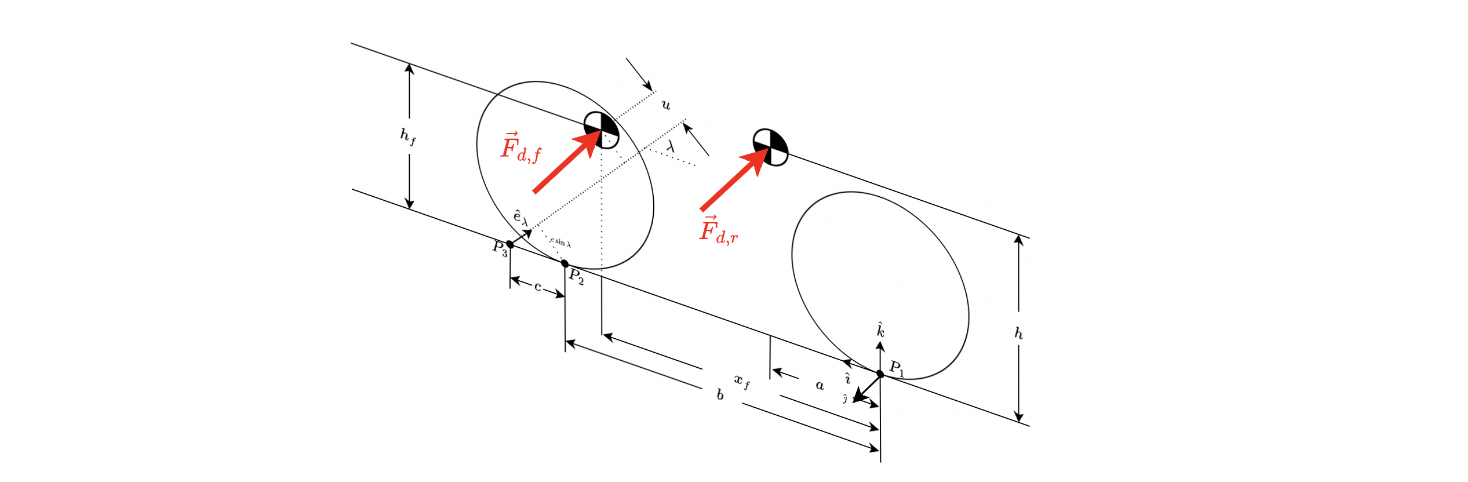

We can therefore write the centrifugal forces acting on the front and rear frames as:

\begin{equation}
\begin{aligned}
\vec{F}_{d,r} &=  -m_rU\dot{\psi} \\
\vec{F}_{d,f} &=  -m_fU\dot{\psi} \\
\end{aligned}
\end{equation}

We will use these forces to compute the D'Alembert torques acting on each of the bike's degrees of freedom in the next section.

## Computation of D'Alembert Torques about the roll and yaw axes

To compute the torque about the roll and yaw axes resulting from the two D'Alembert "centrifugal" forces above, we only need to use the definition of torque as $\vec{T}=\vec{r}\times\vec{F}$.

The distance vectors from the bike's origin to the rear and front frames' centers of mass can be written as $\vec{r}_{r/a}$ and $\vec{r}_{f/a}$ respectively:

\begin{equation}
\begin{aligned}
\vec{r}_{r/a} &= \left(a\hat{\imath} + h_r\hat{k}\right)\\
\vec{r}_{f/a} &= \left(x_f\hat{\imath} + h_f\hat{k}\right)
\end{aligned}
\end{equation}

Then, the total torque vector about point $P_1$ from D'Alembert forces can be written as $\vec{\tau}_{DA,P1}$:

\begin{equation}
\begin{aligned}
\vec{\tau}_{DA,P1} &= \vec{r}_{r/a}\times\vec{F}_{d,r} + \vec{r}_{f/a}\times\vec{F}_{d,f}\\
&= \left(a\hat{\imath} + h_r\hat{k}\right)\times -m_rU\dot{\psi}\hat{\jmath} + \left(x_f\hat{\imath} + h_f\hat{k}\right) \times -m_fU\dot{\psi}\hat{\jmath} \\
&= U\dot{\psi}\left( -\left( m_ra+m_fx_f\right)\hat{k} + \left(m_rh_r+m_fh_f\right)\hat{\imath} \right)
\end{aligned}
\end{equation}

Taking the dot product of this torque with the $\hat{\imath}$ (roll) and $\hat{k}$ (yaw) directions gives us two of the three torques we need for the fourth order LaGrangian derivation:

\begin{equation}
\begin{aligned}
\tau_{DA,\phi} &= \frac{U^2\sin\lambda}{b}\delta\left( m_rh_r+m_fh_f\right)\\
\tau_{DA,\psi} &= -\frac{U^2\sin\lambda}{b}\delta\left( m_ra+m_fx_f\right)\\
\end{aligned}
\end{equation}

## Computing the D'Alembert torque about the steer axis

The front frame's D'Alembert force also creates a torque about the steer axis that can do work on the bike (see the figure below). To find this torque, we recognize by inspection that if we can find the perpendicular distance from the steer axis to the front frame's center of mass, $\vec{u} = u\hat{e}_{u}$, the D'Alembert force will always be perpendicular to both $\vec{u}$ and the steer axis $\hat{e}_\lambda$. This is because no matter what the small steer angle $\delta$ is, and for small roll angles $\phi$, the D'Alembert force on the front frame will always be about the wheel's spin axis, or the local $\hat{j}$ direction of the front wheel. This means that the D'Alembert torque will always be purely about the steer axis, and can be computed simply as:

\begin{equation}
\vec{\tau}_{DA,\delta} = \tau_{DA,\delta}\hat{e}_{\lambda} = \vec{u}\times \vec{F}_{d,f} = U\dot{\psi}m_fu \hat{e}_\lambda
\end{equation}

This means that the final scalar D'Alembert torque needed for the fourth order model's LaGrangian derivation is:

\begin{equation}
\tau_{DA,\delta} =  U\dot{\psi}m_fu 
\end{equation}

However, the value of "u" is not obvious. To compute it, consider the figure below.

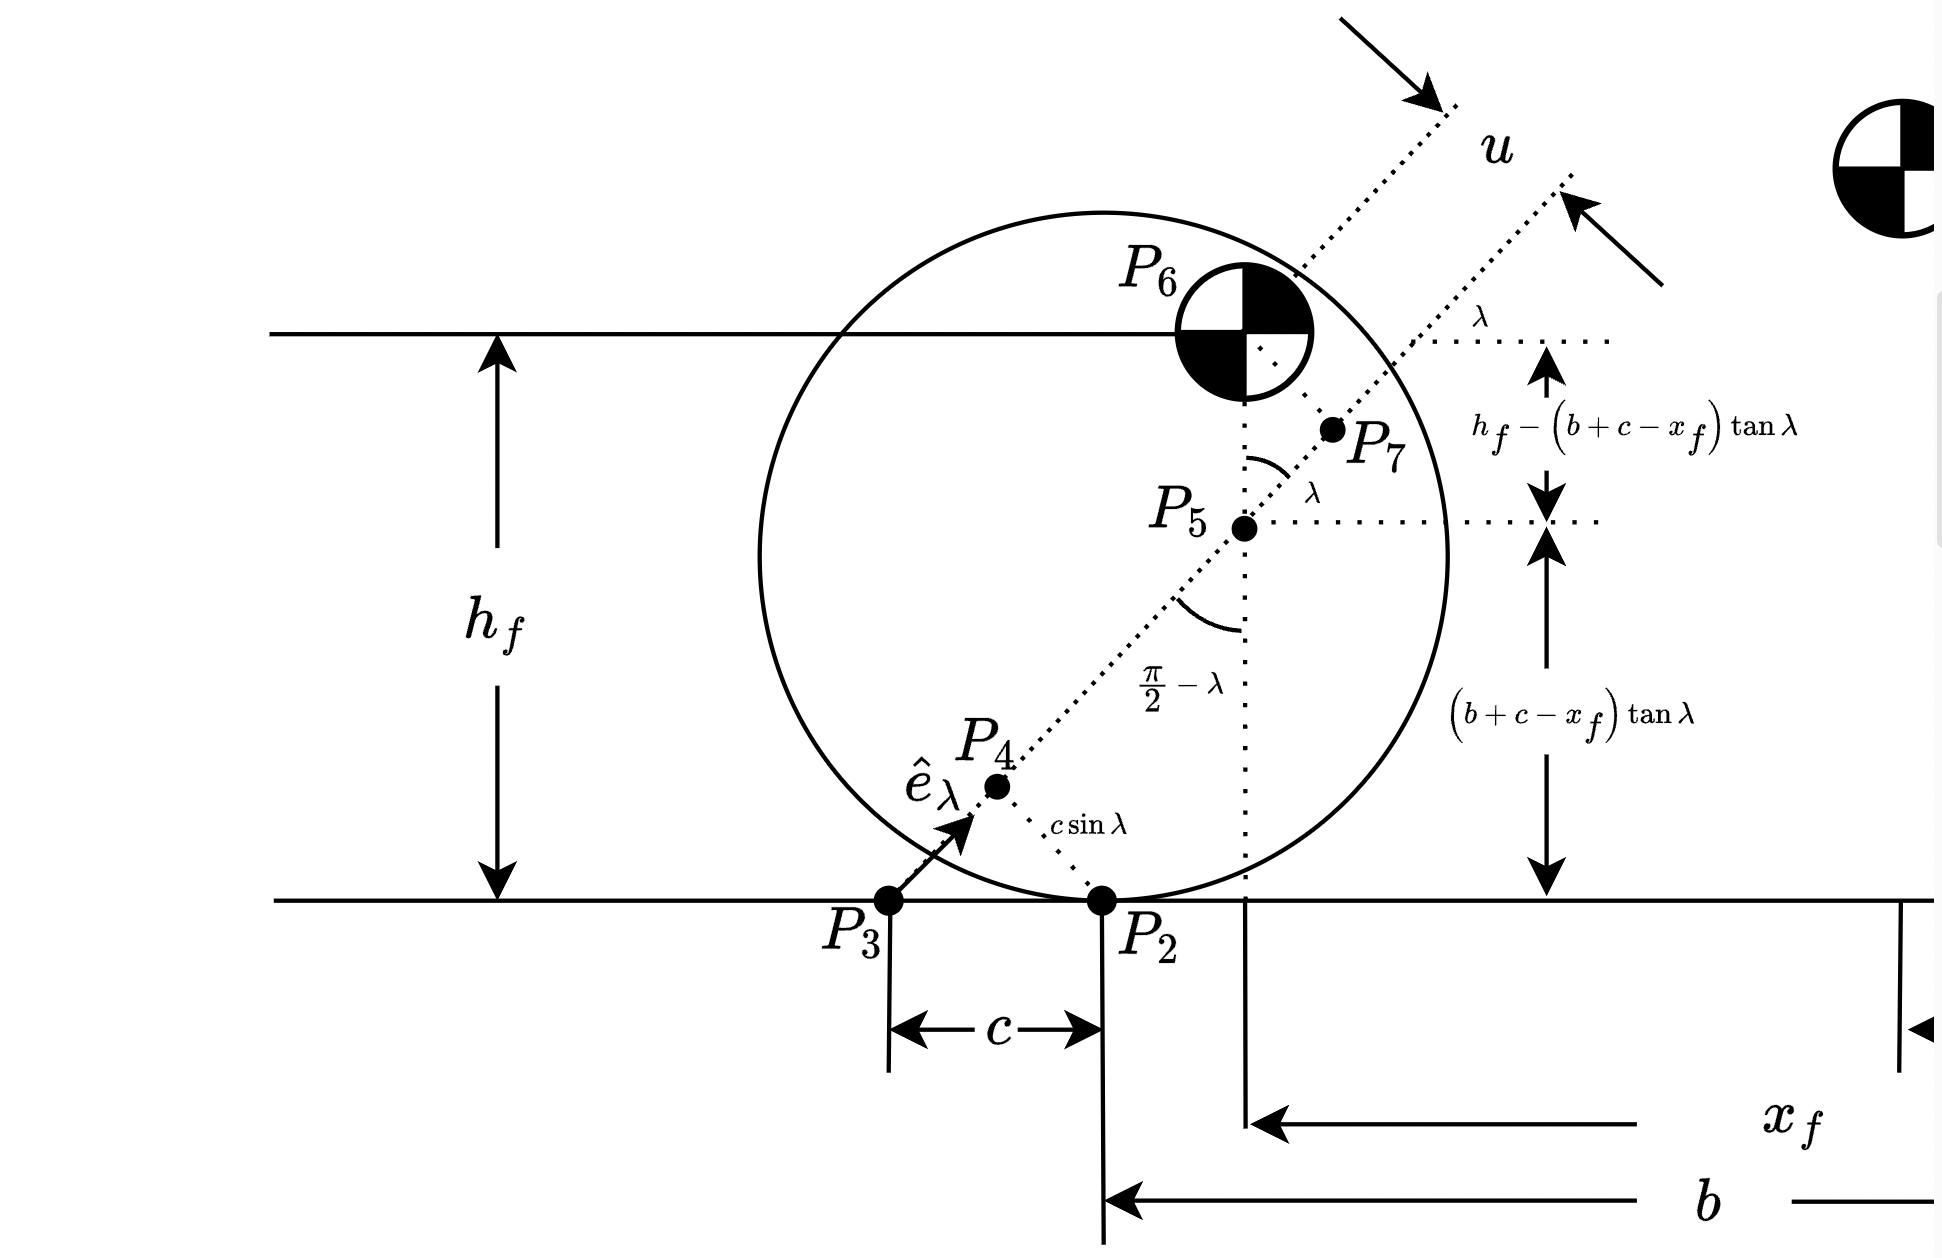

Using the right triangle $P_5P_6P_7$, we find via the figure that because the distance between the ground plane and $P_5$ is $\left(b+c-x_f\right)\tan\lambda$, the triangle $P_5P_6P_7$'s hypotenuse is $h_f-\left(b+c-x_f\right)\tan\lambda$. This means that we can write:

\begin{equation}
\begin{aligned}
u &= \left(h_f-\left(b+c-x_f\right)\tan\lambda\right)\sin\left(\frac{\pi}{2}-\lambda\right) \\
&= h_f\cos(\lambda)-(b+c-x_f)\sin(\lambda)
\end{aligned}
\end{equation}